In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
def manhattan(x1: int, y1: int, x2: int, y2: int) -> int:
    return abs(x1 - x2) + abs(y1 - y2)

def lr_proba(dist, alpha):
    if not isinstance(dist, np.ndarray):
        dist = np.array(dist, dtype=float)
    
    zero_mask = dist <= 1
    result = np.zeros_like(dist)
    result[~zero_mask] = dist[~zero_mask] ** -alpha
    return result

Text(0, 0.5, 'Probability')

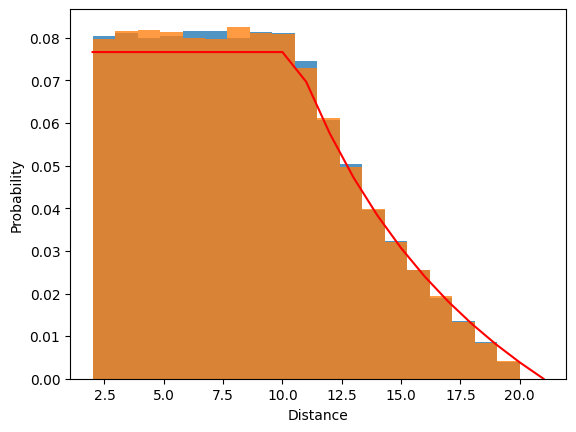

In [69]:
def num_of_distance(n,i):
    assert n % 2 == 1
    diameter = (n-1) // 2
    if i == 0:
        return 1
    if i <= diameter:
        return 4 * i
    z = 2*diameter - i+1
    return 4 * z


class ReferenceDistanceSampler:
    def __init__(self, n: int, alpha: float):
        self.n = n
        self.alpha = alpha
        proba_mtx = np.zeros((n*2+1, n*2+1))
        for i in range(n*2+1):
            for j in range(n*2+1):
                dist = manhattan(n, n, i, j)
                proba_mtx[i, j] = lr_proba(dist, alpha)
        proba_mtx /= proba_mtx.sum()
        self.probas = proba_mtx.flatten()
        self.index = np.arange(len(self.probas))

    def sample(self, num_samples: int = 1):
        indices = np.random.choice(self.index, p=self.probas, size=num_samples)
        x, y = np.unravel_index(indices, (self.n*2+1, self.n*2+1))
        x -= self.n
        y -= self.n
        return np.abs(x) + np.abs(y)
    

class MultinomialDistanceSampler:
    def __init__(self, n: int, alpha: float) -> None:
        self.n = n
        self.alpha = alpha
        self.max_dist = n*2+1
        self.values = np.arange(2, self.max_dist+1)
        self.probas = lr_proba(self.values.astype(float), alpha)
        for i in range(2, self.max_dist+1):
            self.probas[i-2] *= num_of_distance(n*2+1, i)
        self.probas /= self.probas.sum()

    def sample(self, num_samples: int = 1):
        return np.random.choice(self.values, p=self.probas, size=num_samples)



m = MultinomialDistanceSampler(10,1)
s = ReferenceDistanceSampler(10, 1)
samples = s.sample(100000)
samples2 = m.sample(100000)
plt.hist(samples, bins=len(set(samples)), density=True, alpha=.78)
plt.hist(samples2, bins=len(set(samples2)), density=True, alpha=.78)
plt.plot(m.values, m.probas, 'r')
plt.xlabel('Distance')
plt.ylabel('Probability')

In [73]:
N = 1000
ALPHA = 0.5
sampler = MultinomialDistanceSampler(N, ALPHA)

In [75]:
%%timeit
sampler.sample(1000)

91 µs ± 94.1 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [76]:
91 / 1000

0.091